In [1]:
%matplotlib inline
import sys
import outliers
import pandas as pd
import matplotlib.pyplot as plt
from outliers import ddc_outlier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import normalize
from sklearn.metrics import f1_score
import numpy as np

import warnings
warnings.filterwarnings('ignore')

prescription = pd.read_csv('../data/prescriptions_subdose.csv.gz', compression='gzip')

In [2]:
medications = outliers.getOverdoseMedications(prescription)
medications.shape

(74,)

In [3]:
ep_range = np.arange(0.01,1.0,0.01)
results, max_f = outliers.runParameterSearch(prescription, np.asarray(medications), ep_range)

ABACAVIR 300 mg CP, 2124, 22, 4, 264.87994350282486, 278.70852480885253, 151.0, 1.0, 151.0, 600.0, 528.5310734463277, 127.80011934019265, 600.0, 600.0, 600.0, 600.0, 1.228813559322034, 0.4200689400472451, 1.0, 1.0, 1.0, 1.0, (DDC+0.91), 1.0, , (Cov+0.62), 0.07954545454545456, , (IsoF+0.01), 1.0, , (DDC-J+0.04), 1.0, , (DDC-C+0.48000000000000004), 1.0, 
ACICLOVIR 200 mg CP, 2359, 63, 19, 138.44150063586267, 178.69923255932096, 103.0, 3.0, 103.0, 200.0, 273.59050445103856, 165.33482211210094, 200.0, 200.0, 200.0, 200.0, 3.2924968206867318, 0.8494511590487249, 3.0, 3.0, 3.0, 3.0, (DDC+0.9500000000000001), 0.36416184971098264, , (Cov+0.92), 0.23954372623574144, , (IsoF+0.03), 0.696132596685083, , (DDC-J+0.42000000000000004), 0.36416184971098264, , (DDC-C+0.53), 0.46428571428571436, 
ALOPURINOL 100 mg CP, 4729, 23, 12, 79.5297631634595, 99.94326598051478, 53.0, 1.0, 53.0, 100.0, 157.67604144639458, 88.1080476457649, 100.0, 100.0, 100.0, 300.0, 1.3834848805244238, 0.7766278436973779, 1.0, 1.

DIAZEPAM 5 mg CP, 10941, 442, 15, 3.06848094324102, 1.9946474773583804, 2.5, 1.0, 2.5, 5.0, 4.940544739968924, 0.8162208438249557, 5.0, 5.0, 5.0, 5.0, 1.1964171465131157, 0.5308247676318315, 1.0, 1.0, 1.0, 1.0, (DDC+0.9500000000000001), 0.0028288543140028294, , (Cov+0.01), 0.0, , (IsoF+0.03), 0.7700348432055748, , (DDC-J+0.61), 0.5641352903637524, , (DDC-C+0.54), 0.9966178128523112, 
DICLOFENACO 50 mg CP, 5559, 14, 7, 26.57231516459795, 23.689325615197788, 27.0, 3.0, 27.0, 50.0, 50.17089404569167, 2.918132538067915, 50.0, 50.0, 50.0, 50.0, 2.9737362835042274, 0.25874366001102644, 3.0, 3.0, 3.0, 3.0, (DDC+0.91), 0.19310344827586207, , (Cov+0.01), 0.8484848484848484, , (IsoF+0.05), 0.09180327868852459, , (DDC-J+0.02), 0.8484848484848484, , (DDC-C+0.51), 0.14893617021276595, 
DIGOXINA 0,25 mg CP, 3112, 34, 12, 0.5869810411311054, 0.4572540364151411, 0.5, 0.125, 0.5, 1.0, 0.15371786632390746, 0.06011619609539146, 0.125, 0.125, 0.125, 0.125, 1.0202442159383034, 0.19777409667313278, 1.0, 1.0

MORFINA 10 mg/ml SOL ORAL - com conta-gotas acoplado na tampa do frasco ou na embalagem do medicamento, 5362, 302, 127, 17.18864229765013, 24.23375797922363, 8.0, 6.0, 8.0, 20.0, 28.797650130548302, 30.053481640987588, 20.0, 15.0, 20.0, 32.0, 5.579634464751958, 1.3417030660357452, 6.0, 6.0, 6.0, 6.0, (DDC+0.9500000000000001), 0.5036144578313253, , (Cov+0.03), 0.5480769230769231, , (IsoF+0.09), 0.7199017199017199, , (DDC-J+0.38), 0.5393548387096775, , (DDC-C+0.85), 0.31873015873015875, 
OLEO MINERAL LIQ 100 ml, 11930, 164, 23, 11.613621123218776, 10.753071206222524, 8.0, 2.0, 8.0, 20.0, 20.960184409052808, 7.4855327780900724, 20.0, 15.0, 20.0, 20.0, 2.2670578373847445, 0.7123126056175948, 2.0, 2.0, 2.0, 3.0, (DDC+0.92), 0.5359477124183006, , (Cov+0.03), 0.7351598173515981, , (IsoF+0.01), 0.872852233676976, , (DDC-J+0.15000000000000002), 0.627151051625239, , (DDC-C+0.55), 0.7137254901960784, 
ONDANSETRONA 8 mg/4 ml SOL INJ IV, 24905, 52, 9, 5.635996787793616, 2.3985844456873884, 6.0, 3.0

In [4]:
display(results)

,Time,Accuracy,Recall,Precision,F-Measure
DDC,0.041471,0.956842,0.860390,0.507756,0.584763
Cov,0.519176,0.700611,0.616642,0.365793,0.394925
IsoF,0.383216,0.963760,0.911957,0.552119,0.631592
DDC-J,0.033765,0.962573,0.904127,0.611907,0.687436
DDC-C,0.067333,0.932944,0.722320,0.546396,0.519544


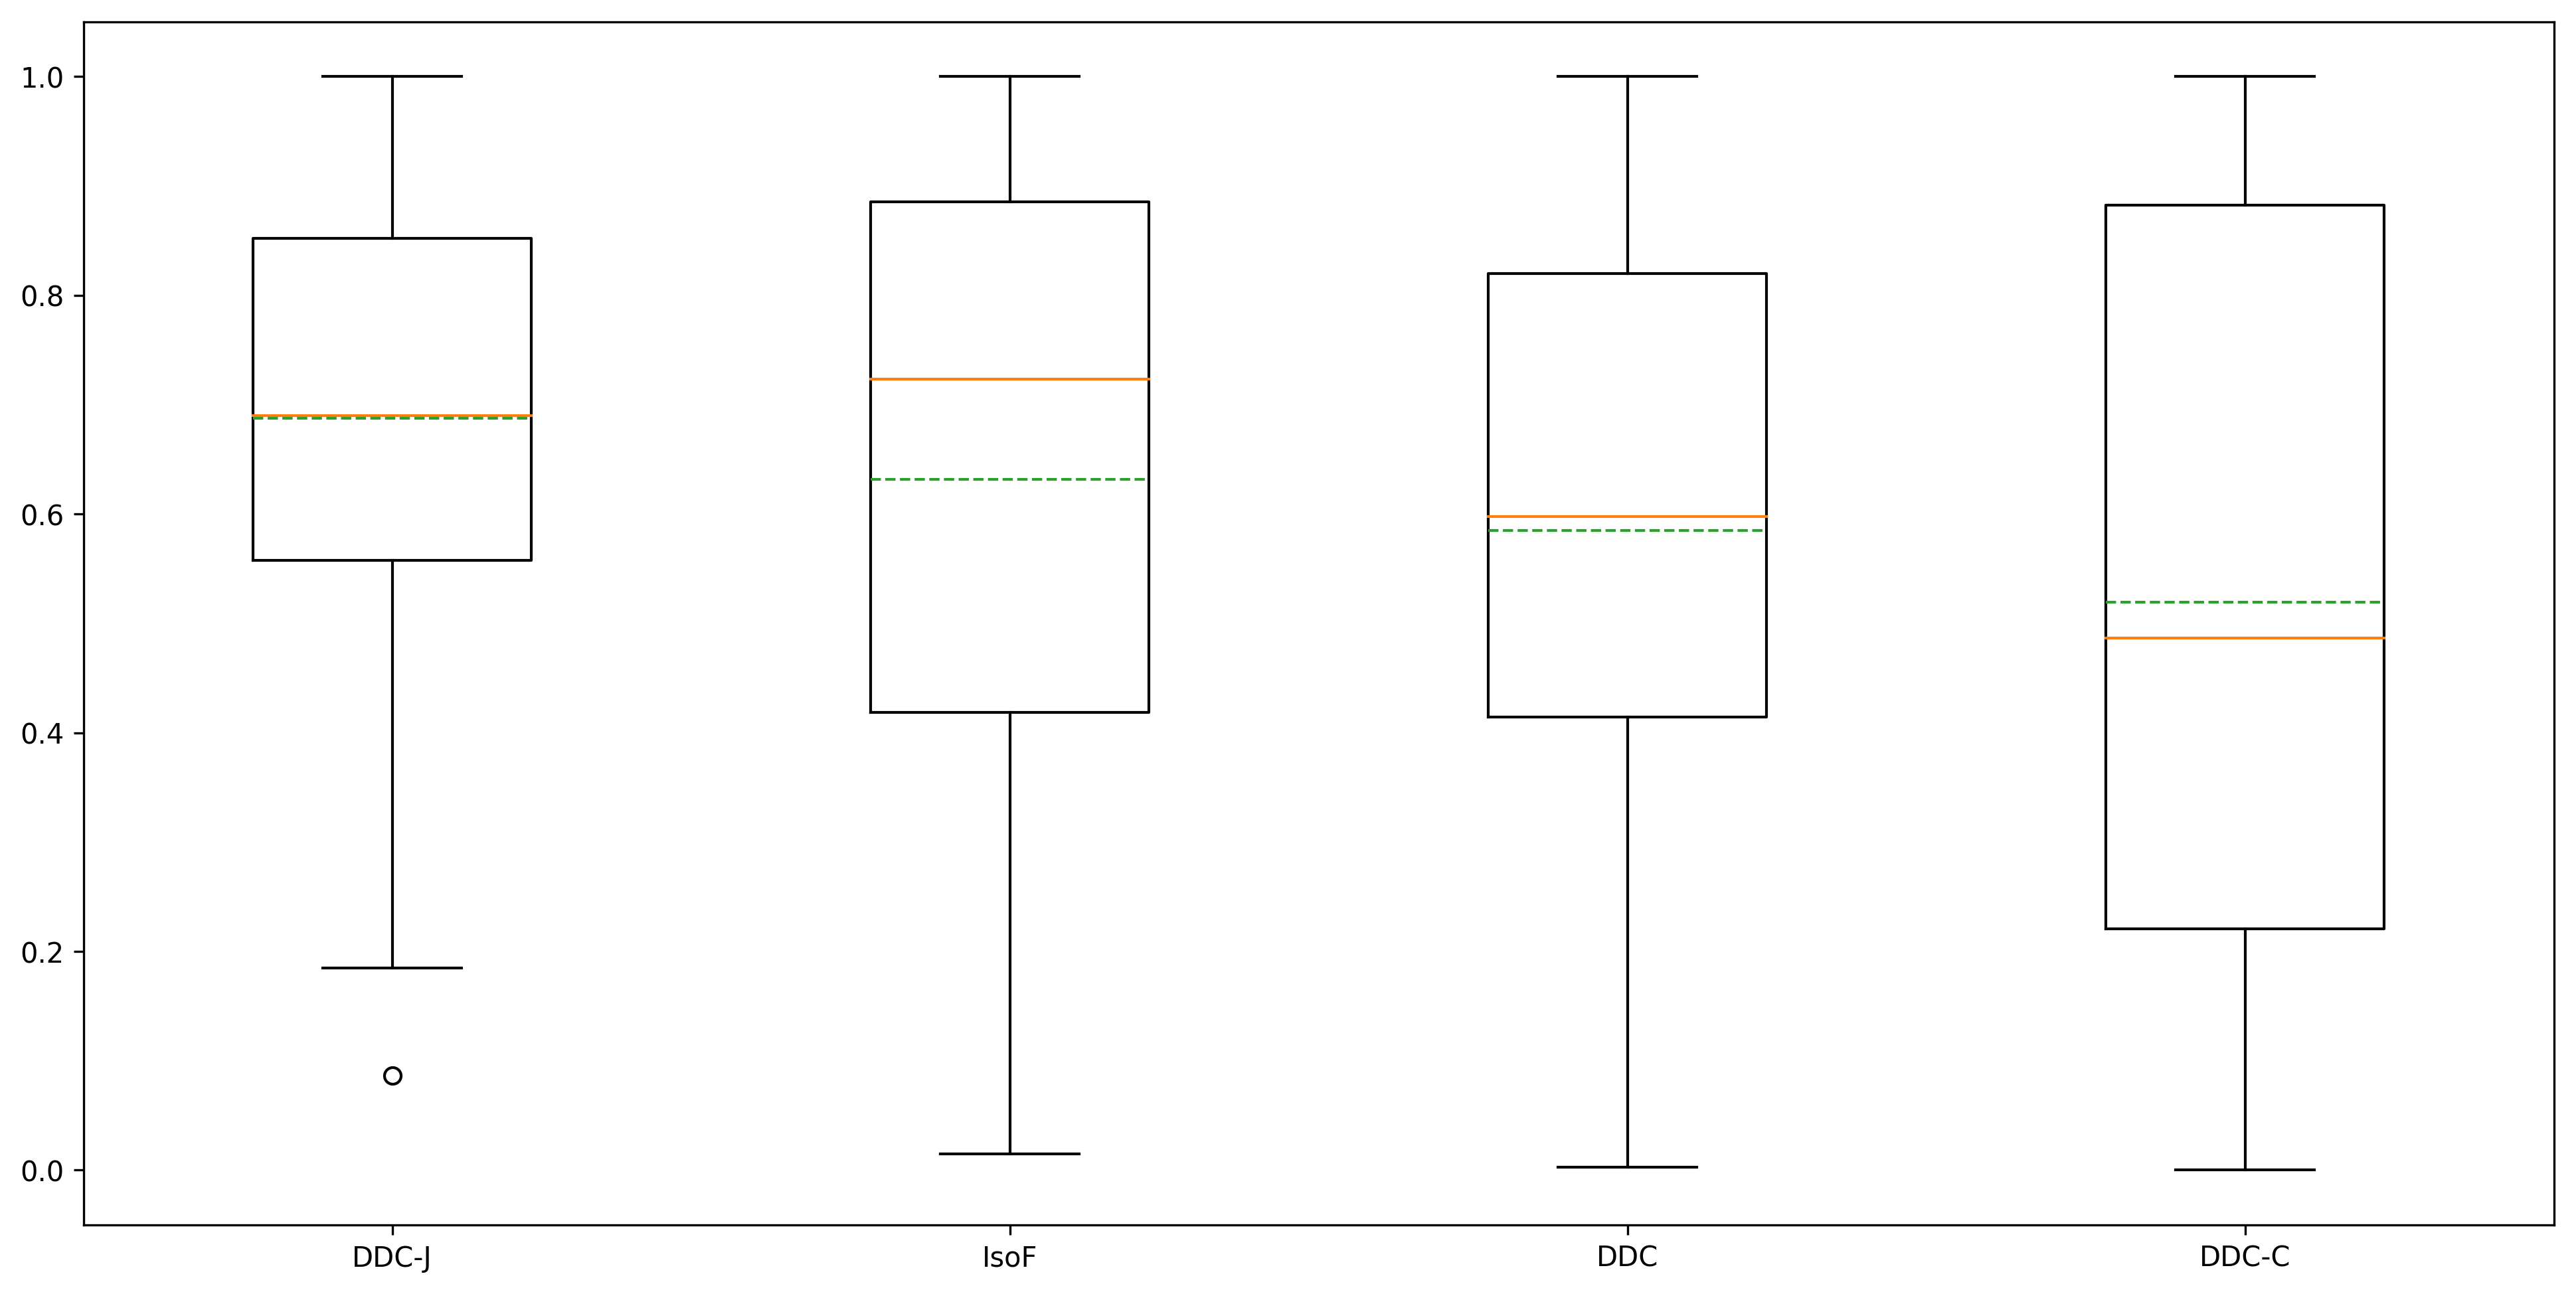

In [7]:
%matplotlib inline
plt.figure(figsize=(16, 8), dpi= 300)

data = []

data.append(max_f.loc['DDC-J'].values)
data.append(max_f.loc['IsoF'].values)
#data.append(max_f.loc['Cov'].values)    
data.append(max_f.loc['DDC'].values)    
data.append(max_f.loc['DDC-C'].values)

labels = ['DDC-J','IsoF','DDC','DDC-C']

plt.boxplot(data, labels=labels, showmeans=True, meanline=True)

plt.show()